In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

AttributeError: module 'seaborn' has no attribute 'set_theme'

# Helper Functions

#### read fithichip peaks files

In [4]:
def read_fithichip_peak_files(file):
    peak_data = {}
    count = 0
    with open(file) as fr:
        for line in fr:
            if line.startswith('c'):
                info = line.strip().split()
                peak_info = info[0:4]
                peak_data[count] = peak_info
                count = count + 1
    return(peak_data)

#### read hicpro stats logs

In [5]:
def read_hicpro_stats_log(log):
    log_data = {}
    count = 0
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                pair_info = info[0:2]
                log_data[count] = pair_info
                count = count + 1
    return(log_data)

#### generate pandas dataframe 

In [41]:
def generate_df(fithichip_peaks_path, sample_name_index):
    data = []
    tpl = fithichip_peaks_path
    glob_str = tpl.format(sample_name='*')
    for fn in glob.glob(glob_str):
        sample_name = fn.split('/')[sample_name_index]
        if sample_name != "washu":
            sample_info = []
            file_path_mpairstat = "/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/hicpro/" + sample_name + "/hic_results/stats/" + sample_name + "/" + sample_name + ".mpairstat"
            file_path_mergestat = "/mnt/BioAdHoc/Groups/vd-ay/hichip-db-loop-calling/results/hicpro/" + sample_name + "/hic_results/stats/" + sample_name + "/" + sample_name + "_allValidPairs.mergestat"
            sample_info.append(sample_name)
            if os.path.exists(file_path_mpairstat):
                pairs_info = read_hicpro_stats_log(file_path_mpairstat)
                sample_info.append(int(pairs_info[0][1]))
            else:
                sample_info.append(int(0))
            if os.path.exists(file_path_mergestat):
                pairs_info = read_hicpro_stats_log(file_path_mergestat)
                sample_info.append(int(pairs_info[0][1]))
            else:
                sample_info.append(int(0))
            if os.path.exists(fn):
                peak_info = read_fithichip_peak_files(fn)
                sample_info.append(len(peak_info))
                peak_sizes = []
                for peak in peak_info.items():
                    peak_sizes.append(int(int(peak[1][2])-int(peak[1][1])))
                sample_info.append(np.mean(peak_sizes))
            else:
                sample_info.append(int(0))   
            data.append(sample_info)
    df = pd.DataFrame(data)
    return df

# Generate Pandas Dataframe

In [42]:
df = generate_df('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling/results/peaks/fithichip/{sample_name}/MACS2_ExtSize/out_macs2_peaks.narrowPeak', 10)
df.columns = ["Sample Name", "Total Pairs Processed", "Valid Interaction Pairs", "Number of HiChIP Peaks (fithichip)","Average Peak Size"]

#### sort by number of hichip peaks (fithichip)

In [44]:
df = df.sort_values(by=["Number of HiChIP Peaks (fithichip)"], ascending=False).reset_index(drop=True)
df.index += 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Sample Name,Total Pairs Processed,Valid Interaction Pairs,Number of HiChIP Peaks (fithichip),Average Peak Size
1,H9.GSE105028.Homo_Sapiens.Rad21.b1,515530130,145833436,211864,526.174546
2,HAVIC.GSE154512.Homo_Sapiens.H3K27ac.b1,691966559,151539207,210112,388.569482
3,HCASMC.GSE101498.Homo_Sapiens.H3K27ac.b1,722202094,234954564,175955,465.458231
4,H9-HS.GSE105028.Homo_Sapiens.Rad21.b1,418316089,114952549,162519,482.570666
5,H9-HS-KI.GSE105028.Homo_Sapiens.Rad21.b1,199983939,38015306,150190,479.619169
6,GM.GSE101498.Homo_Sapiens.H3K27ac.b1,332279257,104375182,144759,395.425265
7,GM.GSE101498.Homo_Sapiens.H3K27ac.b2,299478736,97800990,130144,391.274542
8,AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1,337307006,191374595,105984,436.866018
9,HaCaT_Stimulated.GSE151193.Homo_Sapiens.H3K27a...,630181138,380199595,102026,493.873473
10,MyLa.GSE101498.Homo_Sapiens.H3K27ac.b1,246037528,76593777,101887,424.651810


count        66.000000
mean      51188.727273
std       51492.392165
min         823.000000
25%       12154.000000
50%       32939.500000
75%       72440.250000
max      211864.000000
Name: Number of HiChIP Peaks (fithichip), dtype: float64

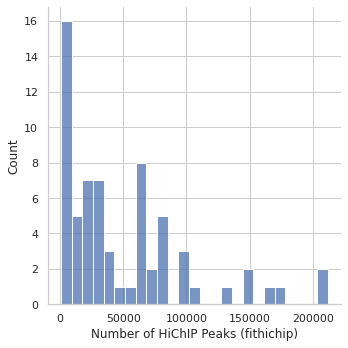

In [48]:
sns.displot(df, bins=25, x="Number of HiChIP Peaks (fithichip)")
df["Number of HiChIP Peaks (fithichip)"].describe()

count     66.000000
mean     348.153053
std      110.089686
min      174.290963
25%      252.733271
50%      336.029187
75%      435.412214
max      592.926123
Name: Average Peak Size, dtype: float64

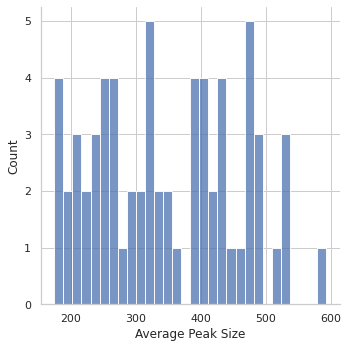

In [51]:
sns.displot(df, bins=30, x="Average Peak Size")
df["Average Peak Size"].describe()